# DNB Seasonal

### Testing with NASA worldview imagery

In [1]:
from PIL import Image
import os
import numpy as np

In [2]:
month = '08_Aug'

In [3]:
images = []
directory = 'NasaWorldview_Imagery/'+month
target_size=(912, 796)

for filename in sorted(os.listdir(directory)):
    if filename.endswith(".jpg"):
        print(filename)
        filepath = os.path.join(directory, filename)
        img = Image.open(filepath)
        img = img.convert('L') #convert images to grayscale
        img = img.resize(target_size)
        images.append(np.array(img))

snapshot-2023-08-01T00_00_00Z.jpg
snapshot-2023-08-02T00_00_00Z.jpg
snapshot-2023-08-03T00_00_00Z.jpg
snapshot-2023-08-04T00_00_00Z.jpg
snapshot-2023-08-05T00_00_00Z.jpg
snapshot-2023-08-06T00_00_00Z.jpg
snapshot-2023-08-07T00_00_00Z.jpg
snapshot-2023-08-08T00_00_00Z.jpg
snapshot-2023-08-09T00_00_00Z.jpg
snapshot-2023-08-10T00_00_00Z.jpg
snapshot-2023-08-11T00_00_00Z.jpg
snapshot-2023-08-12T00_00_00Z.jpg
snapshot-2023-08-13T00_00_00Z.jpg
snapshot-2023-08-14T00_00_00Z.jpg
snapshot-2023-08-15T00_00_00Z.jpg


**When datatype is uint8, values wrap around to zero after going over 255:**

In [4]:
images_array = np.array(images)

In [5]:
total_image_array = np.sum(images_array, axis=0, dtype=np.uint16)

In [6]:
total_image_array

array([[ 909,  898,  898, ...,  764,  765,  770],
       [ 944,  926,  918, ...,  786,  782,  777],
       [ 986,  971,  954, ...,  772,  762,  752],
       ...,
       [ 843,  845,  838, ..., 1203, 1200, 1190],
       [ 841,  836,  842, ..., 1234, 1232, 1221],
       [ 817,  802,  824, ..., 1259, 1271, 1264]], dtype=uint16)

In [7]:
average_array = total_image_array // len(images_array)

In [8]:
average_array.astype('uint8')

array([[60, 59, 59, ..., 50, 51, 51],
       [62, 61, 61, ..., 52, 52, 51],
       [65, 64, 63, ..., 51, 50, 50],
       ...,
       [56, 56, 55, ..., 80, 80, 79],
       [56, 55, 56, ..., 82, 82, 81],
       [54, 53, 54, ..., 83, 84, 84]], dtype=uint8)

In [9]:
brightness_factor = 2
brightened_array = average_array * brightness_factor
brightened_array = np.clip(brightened_array, 0, 255).astype(np.uint8)

average_image = Image.fromarray(brightened_array)
average_image.save('Monthly_Climatology/'+month+'_average_image.jpg')

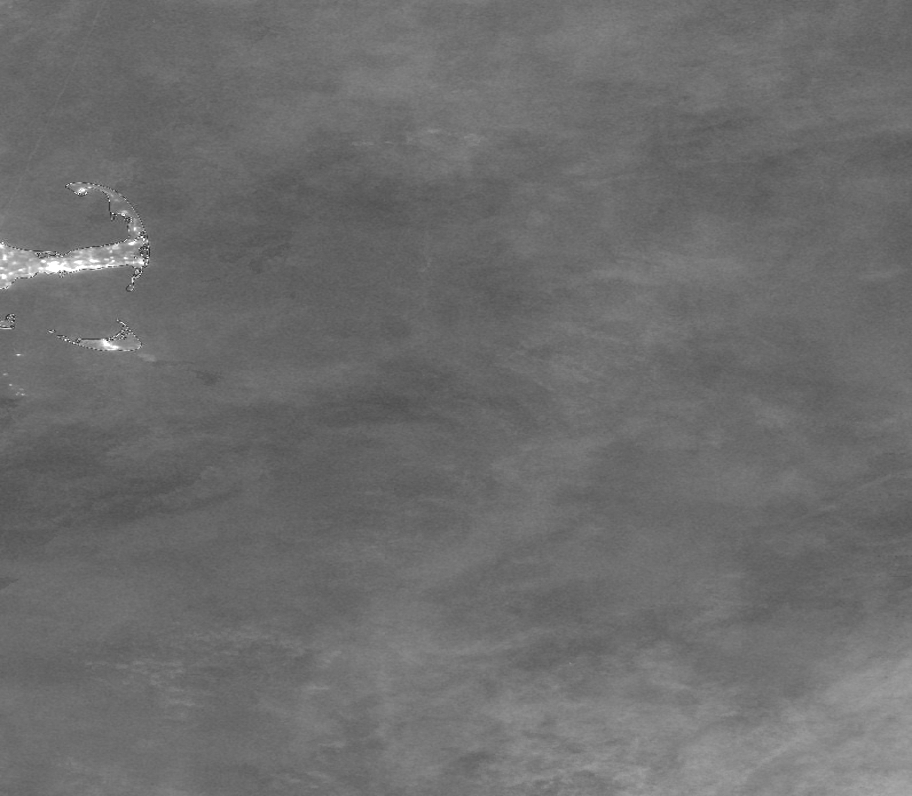

In [10]:
average_image